In [56]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
journey = [0]
rolled = []
doubles = []
turnslist = []

def game(rollnumber, startpoint): 
    
    
    y = 1
    
    while y <= rollnumber: 
    
    
        #starting values
        x = 1

        isdouble = False
        mostrecentrolls = [False, False, False]

        comchest = list(range(1,17)); random.shuffle(comchest)
        comchestcard = 0

        chance = list(range(1,17)); random.shuffle(chance)
        chancecard = 0

        jailfreecard = [False, False] #values of getoutofjailfreecard from communitychest or chance respectively

        currentlocation = startpoint
        
        #journey.append(0)

        while x <= 100: 

            dice1 = random.randint(1,6)
            dice2 = random.randint(1,6)
            numberrolled = dice1 + dice2

            if dice1 == dice2: 
                isdouble = True
            else: 
                isdouble = False

            mostrecentrolls[(x%3 - 2)] = isdouble #tracking double value of last 3 rolls 

            if sum(mostrecentrolls) == 3:
                #print('went to jail for doubles', x)
                currentlocation = 50 #if 3 doubles in a row, go to jail 
                mostrecentrolls = [False, False, False]
            else: 
                currentlocation = (currentlocation + numberrolled)%40


            #COMCHEST SECTION

            if len(comchest) == 0: #if the deck of community cards is empty, refill it
                #print('comchest empty', x)
                comchest = list(range(1,17)); random.shuffle(comchest)

            if currentlocation in [2, 17, 33]: 
                comchestcard = comchest[0]
                comchest.pop(0)
                #print('i took a comchest card', comchestcard, x, y)

                if comchestcard == 1: 
                    journey.append(currentlocation)
                    currentlocation = 0 #go to go

                elif comchestcard == 2: 
                    #print('went to jail from comchest', x)
                    currentlocation = 50 #go to jail 

                elif comchestcard == 3: 
                    jailfreecard[0] = True
                    #print('got a jfc from comchest', x) #get a getoutofjailfree card


            #CHANCE CARDS SECTION

            if currentlocation in [7, 22, 36]: 
                chancecard = chance[0]
                chance.pop(0)
                #print('i took a chance card', chancecard, x, y)

                if chancecard == 1: 
                    journey.append(currentlocation)
                    currentlocation = 0 #go to go

                elif chancecard == 2: 
                    journey.append(currentlocation)
                    currentlocation = 24 #go to illinois avenue

                elif chancecard == 3: 
                    journey.append(currentlocation)
                    currentlocation = 11 #go to st charles place

                elif chancecard == 4: 
                    journey.append(currentlocation)
                    nearestutility = {7:12, 22:28, 36:12}
                    currentlocation = nearestutility[currentlocation] #go to nearest utility

                elif chancecard == 5: 
                    journey.append(currentlocation)
                    nearestrailroad = {7:15, 22:25, 36:5}
                    currentlocation = nearestrailroad[currentlocation] #go to nearest railroad

                elif chancecard == 6: 
                    jailfreecard[1] = True
                    #print('got a jfc from chance', x) #get a getoutofjailfree card

                elif chancecard == 7: 
                    journey.append(currentlocation)
                    currentlocation = currentlocation - 3 #go back 3 spaces

                    if currentlocation == 33: #sometimes going back 3 spaces lands on a community chest card space
                        #print('IT HAPPENED', x)
                        if len(comchest) == 0: #if the deck of community cards is empty, refill it
                            #print('comchest empty', x)
                            comchest = list(range(1,17)); random.shuffle(comchest)
                            comchestcard = comchest[0]
                            comchest.pop(0)
                            #print('i took a comchest card', comchestcard, x)

                        if comchestcard == 1: 
                            journey.append(currentlocation)
                            currentlocation = 0 #go to go

                        elif comchestcard == 2: 
                            #print('went to jail from comchest', x)
                            currentlocation = 50 #go to jail 

                        elif comchestcard == 3: 
                            jailfreecard[0] = True
                            #print('got a jfc from comchest', x) #get a getoutofjailfree card

                elif chancecard == 8: 
                    #print('went to jail from chance', x)
                    currentlocation = 50 #go to jail

                elif chancecard == 9: 
                    journey.append(currentlocation)
                    currentlocation = 5 #go to reading railroad

                elif chancecard == 10: 
                    journey.append(currentlocation)
                    currentlocation = 39 #go to boardwalk

            if len(chance) == 0: #if the deck of chance cards is empty, refill it
                #print('chance empty', x)
                chance = list(range(1,17)); random.shuffle(chance)


            #JAIL

            if currentlocation == 30: #if you land on the go to jail square, go to jail
                currentlocation = 50 

            if currentlocation == 50: #if you are in jail
                #print('i\'m in jail', x)
                journey.append(currentlocation)

                if jailfreecard[0] == True: #if you have a getoutofjailfree card
                    jailfreecard[0] = False
                    #print('out of jail with jfc from comchest', x)
                    continue
                elif jailfreecard[1] == True: #if you have a getoutofjailfree card
                    jailfreecard[1] = False
                    #print('out of jail with jfc from chance', x)
                    continue
                else:   
                    turns = 1
                    while turns <=3: 
                        dice1 = random.randint(1,6)
                        dice2 = random.randint(1,6)
                        numberrolled = dice1 + dice2

                        if dice1 == dice2: 
                            isdouble = True
                        else: 
                            isdouble = False

                        if isdouble == True: 
                            break

                        turns += 1
                    #print('out of jail', turns)
                    turnslist.append(turns)
                    currentlocation = 10 + numberrolled


            journey.append(currentlocation%40) #squares visited

            rolled.append(numberrolled) #what was rolled throughout the game

            doubles.append(isdouble) #is it a double? 

            x += 1

        y += 1
        
        #journey.append('reset')
        
    
    #print(journey)
    #print(rolled)
    #print('done')
    
    
game(500000, 0)


done


In [3]:
journeycounting = (pd.Series(journey).value_counts()/len(journey)*100)

newdf = pd.DataFrame(journeycounting.sort_index())
newdf['index'] = newdf.index
names = ['Go','Mediterranean Avenue','Community chest','Baltic Avenue','Income tax','Reading railroad',
         'Oriental Avenue','Chance','Vermont Avenue','Connecticut Avenue','Jail','St. Charles Place',
         'Electric company','States Avenue','Virginia Avenue','Pennysylvania Railroad','St. James Place',
         'Community chest','Tennessee Avenue','New York Avenue','Free parking','Kentucky Avenue','Chance',
         'Indiana Avenue','Illinois Avenue','B & O Railroad','Atlantic Avenue','Ventnor Avenue','Water works',
         'Marvin Gardens','Pacific Avenue','North Carolina Avenue','Community chest',
         'Pennsylvania Avenue','Short line','Chance','Luxury tax','Park Place','Boardwalk','Actual Jail']

newdf['names'] = names
newdf.columns = ['percentage', 'index', 'names']

line = pd.DataFrame({'percentage': 0.0, 'index': 30, 'names':'Go to Jail'}, index=[30])
df2 = pd.concat([newdf.iloc[:30], line, newdf.iloc[30:]])

In [58]:
df2

,percentage,index,names
0,2.885436,0,Go
1,2.003141,1,Mediterranean Avenue
2,1.918602,2,Community chest
3,2.082590,3,Baltic Avenue
4,2.272565,4,Income tax
5,2.753477,5,Reading railroad
6,2.248173,6,Oriental Avenue
7,2.168054,7,Chance
8,2.305446,8,Vermont Avenue
9,2.269254,9,Connecticut Avenue


In [24]:
#trying to find out which journeys are most common

masterlist = [[0 for x in range(41)] for y in range(41)] #creates a list of 40 lists filled with 40 zeros

journey2 = journey

for x, y in enumerate(journey2): #changing jail from index 50 to 40
    if y == 50:
        journey2[x] = 40

ha


In [26]:
#counts the number of times the player moved from each square to every other square

h = 0    
while h < len(journey2) - 1:
    x = journey[h]
    y = journey[h+1]
  
    masterlist[x][y] = 1 + masterlist[x][y]
    h += 1

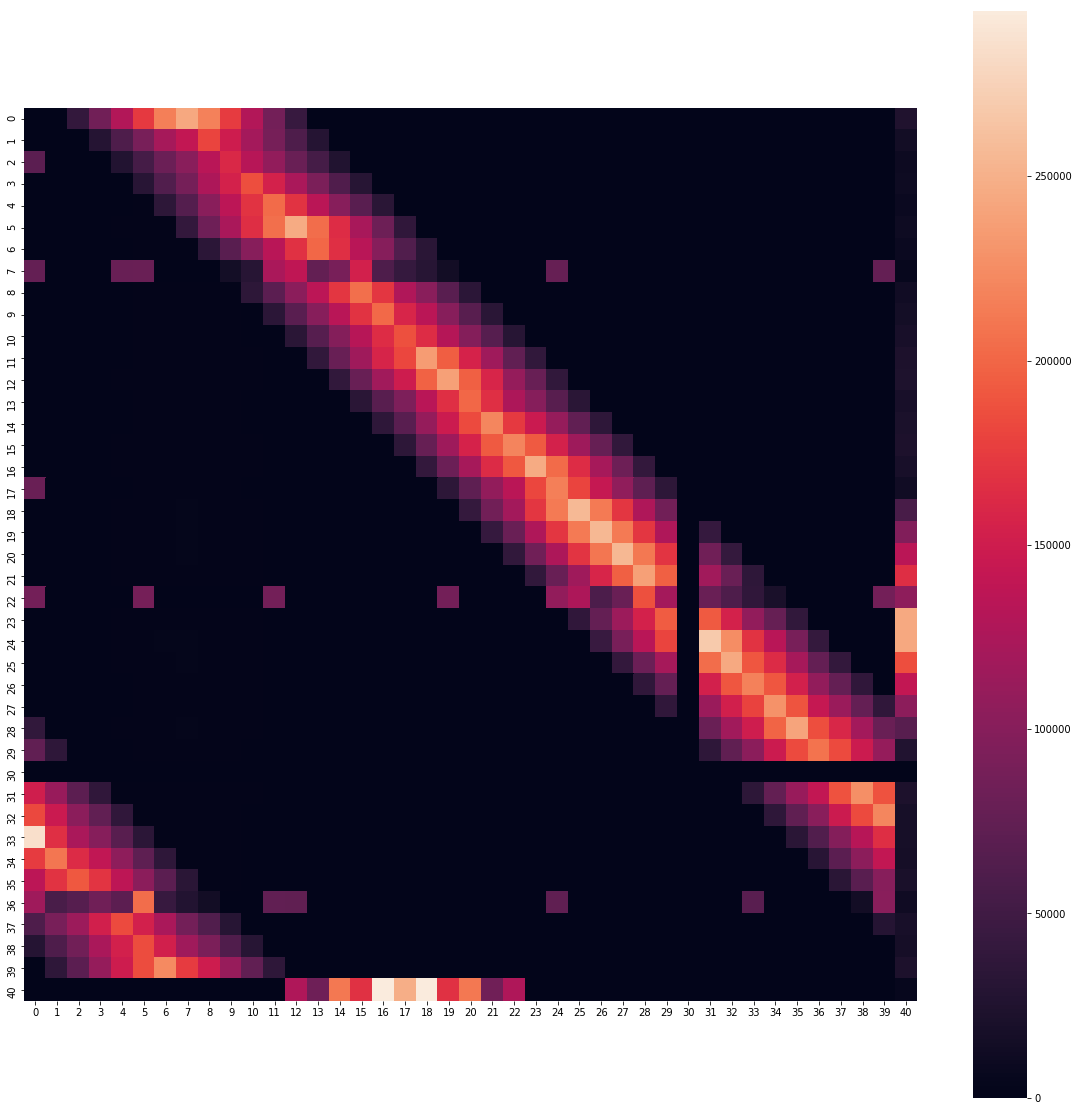

In [50]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(pd.DataFrame(masterlist), annot = False, cbar = True, square = True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CB33C4C88>]],
      dtype=object)

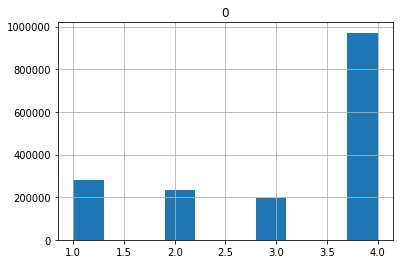

In [55]:
pd.DataFrame(turnslist).hist()

In [0]:
#notes: 

'''
Assume that when replacing an empty deck, you add new jailfreecards. Although you cant have multiple jfc from the same source, the deck is not one short 
because you already hold the jfc


The monopoly companion
'''

SyntaxError: ignored